In [3]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.decomposition import PCA

data='/oak/stanford/groups/smontgom/moqri/data/meth/'
n=100

def calc(cell):
    print (cell)
    df=pd.read_feather(data+cell+'.ft')
    df=df.set_index('index')
    print(df.shape)
    cor=df.corrwith(df.age).drop('age').sort_values()
    #print(cor)
    #cor.hist(bins=100)
    #plt.show()
    topp=cor.tail(n).index
    print(len(topp.intersection(cgi)))
    topn=cor.head(n).index
    y=df[df.age<df.age.quantile(1/3)].median().drop('age')
    o=df[df.age>df.age.quantile(2/3)].median().drop('age')
    dg=pd.concat([sp.median(),hsc.median(),y,df.drop('age',1).median(),o],1)
    dg.columns=['sp','hsc','y','m','o']
    dg['up_sp']=dg.m>dg.sp
    dg['up_hsc']=dg.m>dg.hsc
    print(dg.loc[topp].up_sp.value_counts())
    print(dg.loc[topp].up_hsc.value_counts())
    fig, ax = plt.subplots()
    fig.set_size_inches(4,3)    
    sn.lineplot(data=dg.loc[topp][['sp','hsc','y','m','o']].T,legend=False)
    ax.set_xticklabels(['Sperm','HESC','Young','Middle','Old'])
    ax.set_ylabel("Methylation Level (median beta)")
    plt.show()
    fig, ax = plt.subplots()
    dgp=dg.loc[topp][['up_sp','up_hsc']].sum()
    dgp['Island']=len(topp.intersection(cgi))
    fig.set_size_inches(4,3)    
    sn.barplot(dgp.index, dgp.values)
    ax.set_xticklabels(['Up (Sperm)','Up (HESC)','Island'])
    ax.set_ylabel("Number of CpGs (out of top 100)")
    ax.set_ylim(0,100)    
    plt.show()  
    print(dg.loc[topn].up_sp.value_counts())
    print(dg.loc[topn].up_hsc.value_counts())
    sn.lineplot(data=dg.loc[topn][['sp','hsc','y','m','o']].T,legend=False);plt.show()
    dg.loc[topn][['up_sp','up_hsc']].sum().plot(kind='bar');plt.show()    
    return (df)

In [5]:
man=pd.read_csv(data+'manm.csv',index_col=0)
print(man.shape)

/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(473864, 39)


In [6]:
ips=pd.read_feather(data+'ips.ft')
ips=ips.set_index('index')
ips=ips[man.index]
print(ips.shape)

(23, 473864)


In [7]:
icor=ips.T.corr().mean().sort_values()
icor[1:]

index
GSM867976    0.987269
GSM867970    0.988361
GSM867981    0.988579
GSM867969    0.988645
GSM867972    0.988774
GSM867989    0.989019
GSM867982    0.989046
GSM867967    0.989047
GSM867977    0.989060
GSM867979    0.989470
GSM867987    0.989543
GSM867974    0.989567
GSM867973    0.989579
GSM867975    0.989625
GSM867971    0.989640
GSM867980    0.989664
GSM867978    0.989871
GSM867968    0.990058
GSM867983    0.990240
GSM867985    0.990637
GSM867984    0.990678
GSM867988    0.990789
dtype: float64

In [8]:
hsc1=pd.read_feather(data+'hsc1.ft')
hsc1=hsc1.set_index('index')
hsc1=hsc1[man.index]
print(hsc1.shape)

(19, 473864)


In [9]:
hcor1=hsc1.T.corr().mean().sort_values()
hcor1[3:]

index
GSM867944    0.967310
GSM867943    0.968888
GSM867942    0.969791
GSM867939    0.970496
GSM867945    0.970664
GSM867951    0.972906
GSM867938    0.973234
GSM867940    0.973572
GSM867952    0.973624
GSM867946    0.974002
GSM867941    0.975080
GSM867950    0.975322
GSM867937    0.976088
GSM867954    0.976997
GSM867936    0.977091
GSM867953    0.977371
dtype: float64

In [10]:
hsc2=pd.read_feather(data+'hsc2.ft')
hsc2=hsc2.set_index('index')
hsc2=hsc2[man.index]
print(hsc2.shape)

(13, 473864)


In [11]:
hcor2=hsc2.T.corr().mean().sort_values()
hcor2

index
GSM1427172    0.964833
GSM1427175    0.970178
GSM1427173    0.970199
GSM1427174    0.970889
GSM1427170    0.971361
GSM1427176    0.971581
GSM1427287    0.974741
GSM1427286    0.974848
GSM1427285    0.974990
GSM1427288    0.975039
GSM1427284    0.975278
GSM1427169    0.976134
GSM1427171    0.978273
dtype: float64

In [12]:
hsc=hsc1[3:].append(hsc2)
hsc.shape

(29, 473864)

In [13]:
cgi=man[man['Relation_to_UCSC_CpG_Island']=='Island'].index.intersection(hsc.columns)
print(len(cgi))

145842


In [14]:
sp=pd.read_feather(data+'sp.ft')
sp=sp.set_index('index')
print(sp.shape)

(37, 485513)


In [ ]:
cells=['liver','wb','t','mono']
for cell in cells:
    df=calc(cell)

In [15]:
cell='t'
df=pd.read_feather(data+cell+'.ft')

In [16]:
    df=df.set_index('index')
    print(df.shape)
    cor=df.corrwith(df.age).drop('age').sort_values()
    #print(cor)
    #cor.hist(bins=100)
    #plt.show()

(214, 485578)


In [18]:
cor

cg03638795   -0.444816
cg05093315   -0.423376
cg15393490   -0.420762
cg19283806   -0.415885
cg05412028   -0.415459
                ...   
cg14361627    0.528184
cg06784991    0.531159
cg06639320    0.552125
cg07544187    0.565068
cg16867657    0.576630
Length: 485577, dtype: float64

In [14]:
n=100
topp=cor.tail(n).index
#topp=cor.tail(0).index

In [21]:
topp[-10:]

Index(['cg06782035', 'cg21572722', 'cg08097417', 'cg24724428', 'cg22454769',
       'cg14361627', 'cg06784991', 'cg06639320', 'cg07544187', 'cg16867657'],
      dtype='object')

In [16]:
topn=cor.head(n).index
#topn=cor.head(0).index        

In [17]:
topn[:10]

Index(['cg03638795', 'cg05093315', 'cg15393490', 'cg19283806', 'cg05412028',
       'cg10501210', 'cg03484180', 'cg08337633', 'cg07211259', 'cg22793142'],
      dtype='object')

In [513]:
x=df.reset_index(drop=True)[topp.tolist()+topn.tolist()]

In [514]:
#x=(x.append(hsc.loc[:,topp.tolist()+topn.tolist()]).reset_index(drop=True))
#x=(x.append(ips.loc[icor[1:].index,topp.tolist()+topn.tolist()]).reset_index(drop=True))
#x=x.apply(lambda y: y.fillna(y.mean()),axis=0)

In [515]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [517]:
x['target']=pd.qcut(df.age,2,labels=['young','old']).values.tolist()#+['esc']*len(hsc)+['ips']*(len(ips)-1)
finalDf = pd.concat([principalDf, x[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-0.215274,-0.125833,old
1,0.328411,-0.141259,old
2,0.062613,-0.082914,old
3,-0.025295,-0.143353,young
4,-0.086058,-0.069644,young
...,...,...,...
651,0.333654,-0.109898,old
652,0.053889,-0.029135,old
653,-0.039123,-0.029670,old
654,0.048025,0.009879,young


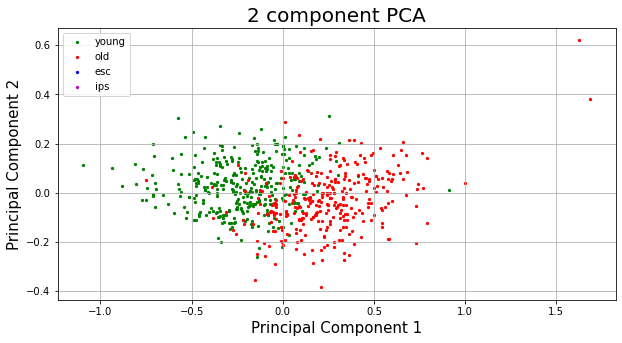

In [518]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['young','old','esc','ips']
colors = ['g', 'r','b','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [519]:
x=(hsc.loc[:,topp.tolist()+topn.tolist()]).reset_index(drop=True)
x=x.apply(lambda y: y.fillna(y.mean()),axis=0)
hsct=pca.transform(x)
hsct=pd.DataFrame(hsct)
hsct.columns = ['principal component 1', 'principal component 2']
hsct['target']='esc'

In [521]:
finalDf=finalDf.append(hsct)
x=(ips.loc[icor[1:].index,topp.tolist()+topn.tolist()]).reset_index(drop=True)
x=x.apply(lambda y: y.fillna(y.mean()),axis=0)
hsct=pca.transform(x)
hsct=pd.DataFrame(hsct)
hsct.columns = ['principal component 1', 'principal component 2']
hsct['target']='ips'

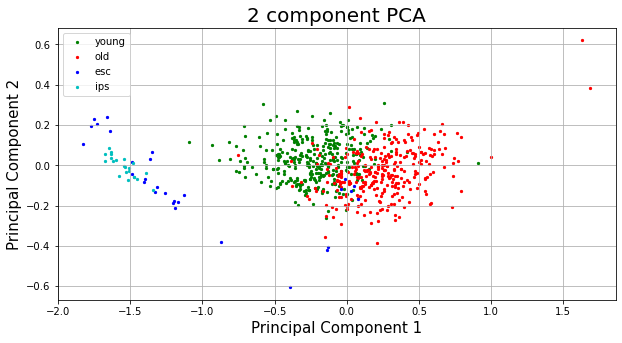

In [523]:
finalDf=finalDf.append(hsct)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['young','old','esc','ips']
colors = ['g', 'r','b','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [524]:
pca.explained_variance_ratio_

array([0.48438278, 0.05427765])

In [527]:
finalDf['principal component 1']=finalDf['principal component 1']*(-1)

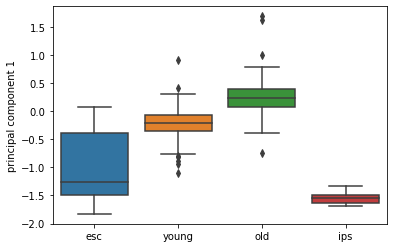

In [528]:
fig, ax = plt.subplots()
sn.boxplot(data=finalDf[['principal component 1','target']],y='principal component 1',x='target',order=['esc','young','old','ips'],
          ax=ax)
ax.set_xlabel("");
